In [1]:
import numpy as np
def custom_lstsq(A, b):
    # Bước 1: Tính A^T * A
    AtA = A.T @ A
    
    # Bước 2: Tính nghịch đảo của A^T * A
    AtA_inv = np.linalg.inv(AtA)
    
    # Bước 3: Tính (A^T * A)^-1 * A^T * b
    x = AtA_inv @ A.T @ b
    
    return x

Hệ số ước lượng: [ 1.02857143 -0.27142857  1.76      ]


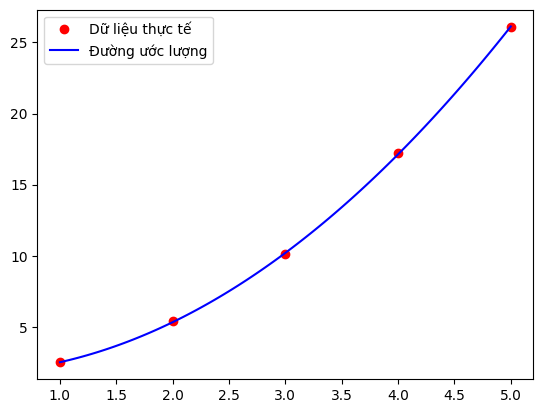

Sai số: [-0.01714286  0.06857143 -0.10285714  0.06857143 -0.01714286]
Tổng bình phương sai số: 0.020571428571428595


In [2]:
import numpy as np

# Dữ liệu đầu vào
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.5, 5.4, 10.1, 17.2, 26.1])  # Giả sử đây là kết quả từ hàm thực nghiệm

# Xây dựng ma trận thiết kế A
A = np.vstack([x_data**2, x_data, np.ones(len(x_data))]).T

# Vector kết quả b
b = y_data

# Áp dụng thuật toán bình phương tối thiểu
x = np.linalg.lstsq(A, b, rcond=None)[0]
# x = custom_lstsq(A, b)
print("Hệ số ước lượng:", x)
# vẽ 
import matplotlib.pyplot as plt

# Vẽ dữ liệu
plt.plot(x_data, y_data, 'ro', label='Dữ liệu thực tế')

# Vẽ đường thẳng ước lượng
t = np.linspace(1, 5, 100)
plt.plot(t, x[0]*t**2 + x[1]*t + x[2], 'b', label='Đường ước lượng')
plt.legend()
plt.show()
# Tính toán sai số
y_pred = A.dot(x)
residuals = y_data - y_pred
print("Sai số:", residuals)
print("Tổng bình phương sai số:", np.sum(residuals**2))

Hệ số ước lượng a: 2.251907094087057
Hệ số ước lượng b: 1.454453168516704


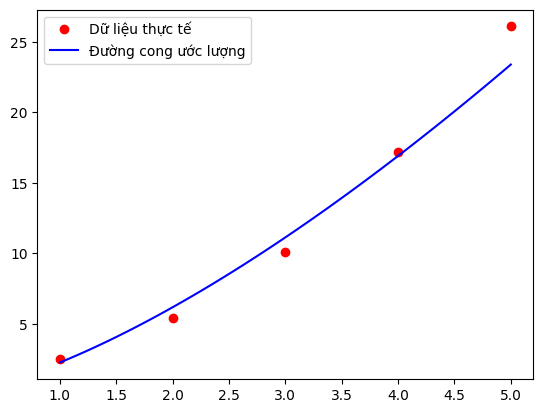

Sai số: [ 0.24809291 -0.77141142 -1.03014929  0.28708247  2.70249189]
Tổng bình phương sai số: 9.103711980298803


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu đầu vào
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.5, 5.4, 10.1, 17.2, 26.1])

# Áp dụng logarit
ln_y_data = np.log(y_data)
ln_x_data = np.log(x_data)

# Xây dựng ma trận thiết kế A cho mô hình logarit
A_log = np.vstack([ln_x_data, np.ones(len(ln_x_data))]).T

# Vector kết quả b cho mô hình logarit
b_log = ln_y_data

# Áp dụng thuật toán bình phương tối thiểu cho mô hình logarit
x_log = np.linalg.lstsq(A_log, b_log, rcond=None)[0]

# Chuyển đổi a trở lại từ logarit
a = np.exp(x_log[1])
b = x_log[0]

print("Hệ số ước lượng a:", a)
print("Hệ số ước lượng b:", b)

# Vẽ dữ liệu
plt.plot(x_data, y_data, 'ro', label='Dữ liệu thực tế')

# Vẽ đường cong ước lượng
t = np.linspace(1, 5, 100)
plt.plot(t, a*t**b, 'b', label='Đường cong ước lượng')
plt.legend()
plt.show()

# Tính toán sai số
y_pred = a*x_data**b
residuals = y_data - y_pred
print("Sai số:", residuals)
print("Tổng bình phương sai số:", np.sum(residuals**2))

Hệ số của đa thức: [-3.23632041e-14  1.02857143e+00 -2.71428571e-01  1.76000000e+00]


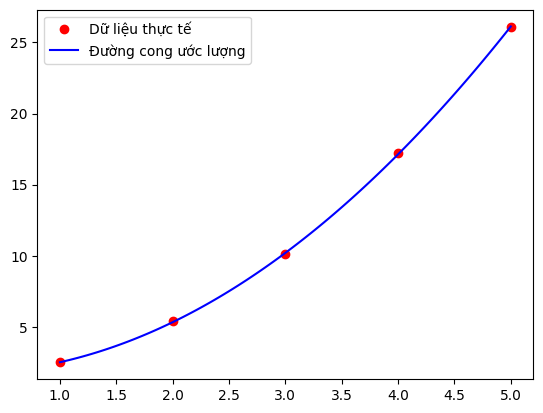

In [6]:
import numpy as np

def custom_lstsq_polyfit(x_data, y_data, degree):
    # Bước 1: Xây dựng ma trận thiết kế A
    A = np.vander(x_data, degree + 1)
    
    # Bước 2: Tính A^TA và A^Tb
    ATA = A.T @ A
    ATb = A.T @ y_data
    
    # Bước 3: Giải phương trình ATA * x = ATb để tìm x
    x = np.linalg.solve(ATA, ATb)
    
    return x

# Dữ liệu đầu vào
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.5, 5.4, 10.1, 17.2, 26.1])

# Độ bậc của đa thức
degree = 3

# Sử dụng hàm custom_lstsq_polyfit
coefficients = custom_lstsq_polyfit(x_data, y_data, degree)

print("Hệ số của đa thức:", coefficients)
# vẽ
import matplotlib.pyplot as plt
t = np.linspace(1, 5, 100)
y = np.polyval(coefficients, t)
plt.plot(x_data, y_data, 'ro', label='Dữ liệu thực tế')
plt.plot(t, y, 'b', label='Đường cong ước lượng')
plt.legend()
plt.show()

